In [1]:
from pylab import *

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston_dataset = load_boston()

In [4]:
import pandas as pd

In [5]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


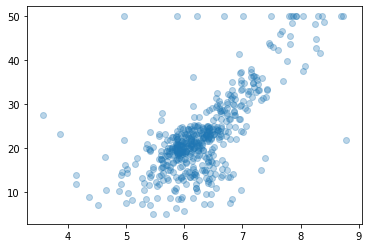

In [6]:
scatter(boston['RM'], boston['MEDV'], alpha=0.3)
show()

In [7]:
X = array(boston['RM'])
Y = array(boston['MEDV'])

In [8]:
print(X.shape, Y.shape)

(506,) (506,)


In [9]:
import tensorflow as tf
import tensorflow.keras as keras

In [10]:
xs = tf.constant(X, shape=(X.shape[0], 1))
ys = tf.constant(Y, shape=(Y.shape[0], 1))

In [11]:
model = keras.Sequential()

In [12]:
model.add(keras.layers.Dense(units=1, input_shape=[1]))

In [13]:
model.compile(loss='mse', optimizer='sgd')

In [14]:
y_predict = model.predict(xs)

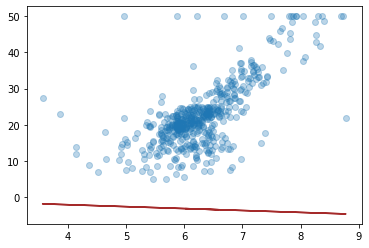

In [15]:
scatter(X, Y, alpha=0.3)
plot(X, y_predict, c="brown")
show()

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.5329064]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

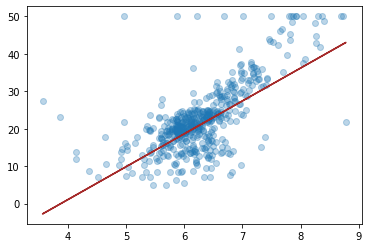

In [18]:
r = model.fit(xs, ys, epochs=1000, verbose=0)

y_predict = model.predict(xs)
scatter(X, Y, alpha=0.3)
plot(X, y_predict, c="brown")
show()

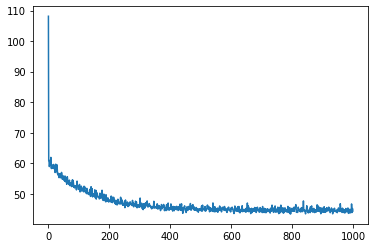

In [19]:
plot(r.history['loss'])

In [20]:
print(r.history['loss'][-1])

44.314103152912125


In [21]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[8.771232]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-33.992443], dtype=float32)>]